### Problem Statement :

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and 
producing cars locally to give competition to their US and European counterparts. 
<br>
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.
<br>
The company wants to understand the factors affecting the pricing of cars in the American market., since those may be very different from the Chinese market. The company wants to know:<br>

    * Which variables are significant in predicting the price of a car
    * How well those variables describe the price of a car
    
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. <br>
    
### Business Goal :

    * Model the price of cars with the available independent variables.
    * The model would enable the management to understand how exactly the prices vary with the independent variables.
    * The management can use the model to accordingly manipulate the design of the cars, the business strategy etc. to meet
      certain price levels.
    * The model will be a good way for the management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing dataset

carInfo = pd.read_csv('CarPrice_Assignment.csv', encoding = 'latin')
carInfo.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# inspect carprice_df dataframe

print("*********************************  Info *******************************************") 
print(carInfo.info())
print("*********************************  Shape ******************************************") 
print(carInfo.shape)
print("**************************** Columns having null values *****************************")
print(carInfo.isnull().any())
print("**************************** Describe *****************************")
carInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressi

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Cleaning

In [5]:
# check for percentage of null values in each column

percent_missing = round(100*(carInfo.isnull().sum()/len(carInfo.index)), 2)
print(percent_missing)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


There are no null values in the dataframe

In [6]:
# Check if there are any duplicate values in the dataset

carInfo[carInfo.duplicated(keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no duplicate values in the dataframe

The independent variable carName comprises of 2 information, car company name and car model. or example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
<br>
Since we need to only consider the car company name, we need to take only the first part of the carName and use that for further analysis and model building

In [7]:
# Split the car Name and check for unique car names to understand if the car names are repeated based on erroneous spellings

carInfo['CarName'] = carInfo['CarName'].str.split(' ', expand = True)[0]
carInfo.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# Since the car names are duplicated with erroneous spellings, correct the cpellings and replace the values.
# Also noticed that the Car Alfa Romeo, though appears once is wrongly spelt as Alfa Romero. Hence this should also be corrected

# Replace alfa-romero to alfa-romeo as the car name is missplet in the data.
# Replace maxda as mazda
# Replace Nissan and nissan
# Replace porcshce as porsche
# Replace toyouta as toyota
# Replace vokswagen, vw as volkswagen

carInfo.CarName = carInfo.CarName.replace({'alfa-romero':'alfa-romeo',
                                                   'maxda': 'mazda',
                                                   'Nissan': 'nissan',
                                                   'porcshce':'porsche',
                                                   'toyouta': 'toyota',
                                                   'vokswagen': 'volkswagen',
                                                   'vw': 'volkswagen'                                                
                                                  })
carInfo.CarName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
# change CarName column to carname to maintain uniformity in the column names

carInfo = carInfo.rename(columns = {"CarName": "carname"}) 

Remove outliers from price column as the difference between the mean and max value seems to be high. 

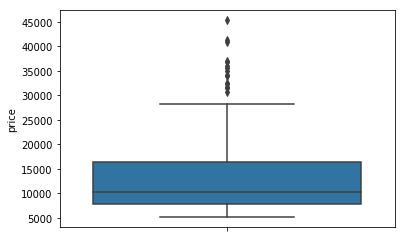

In [10]:
# Check the outliers in price column

sns.boxplot(y = 'price', data = carInfo)
plt.show()

In [11]:
# Removing values beyond 99% in price column

nn_quartile = carInfo['price'].quantile(0.99)
carInfo = carInfo[carInfo["price"] < nn_quartile]
carInfo["price"].describe()  

count      202.000000
mean     12841.834985
std       7192.112132
min       5118.000000
25%       7778.250000
50%      10221.500000
75%      16482.500000
max      37028.000000
Name: price, dtype: float64

In [12]:
carInfo.shape

(202, 26)

## Step 3 Data Visualisation

#### Visualize Numerical Data

<Figure size 720x360 with 0 Axes>

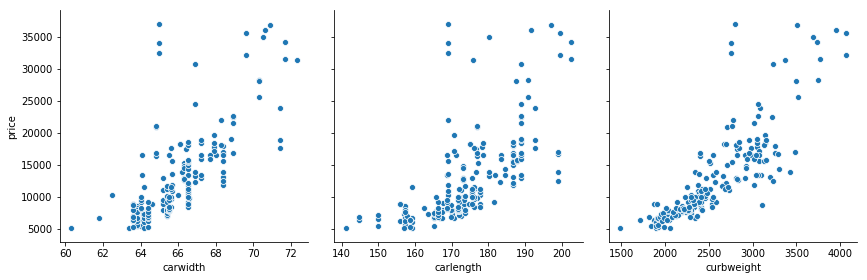

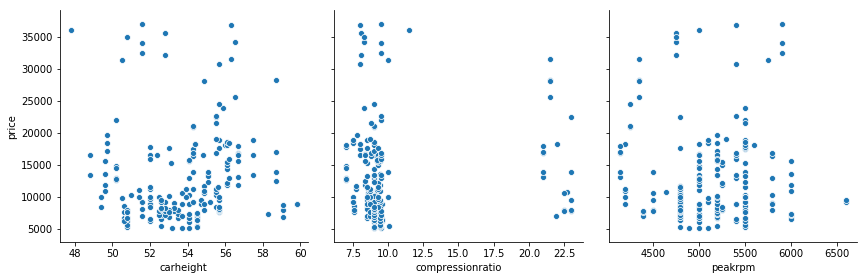

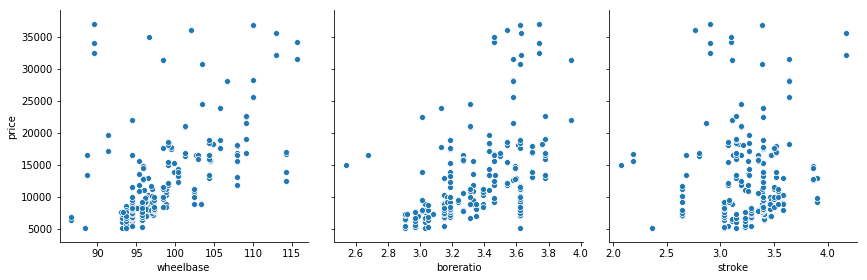

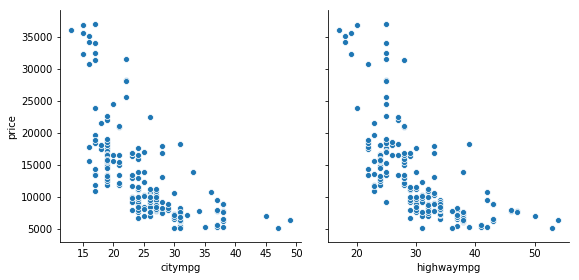

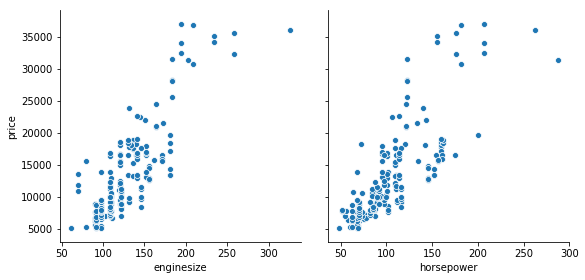

In [13]:
# Making pairplot for all numeric values that we need

plt.figure(figsize=(10,5))
sns.pairplot(carInfo, x_vars=['carwidth','carlength','curbweight'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(carInfo, x_vars=['carheight', 'compressionratio','peakrpm'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(carInfo, x_vars=['wheelbase', 'boreratio','stroke'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(carInfo, x_vars=['citympg','highwaympg'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(carInfo, x_vars=['enginesize','horsepower'], y_vars='price',height=4, aspect=1,kind='scatter')
plt.show()

Observations :
    - carlength, carwidth, curbweight, enginesize and boreratio seems to be showing correlation towards right
    - citympg and highway mpg also seem to be showing some correlation towards left
    - Rest of the variables are too scattered and hence can be understood during firther analysis

#### Visualize Categorical Data

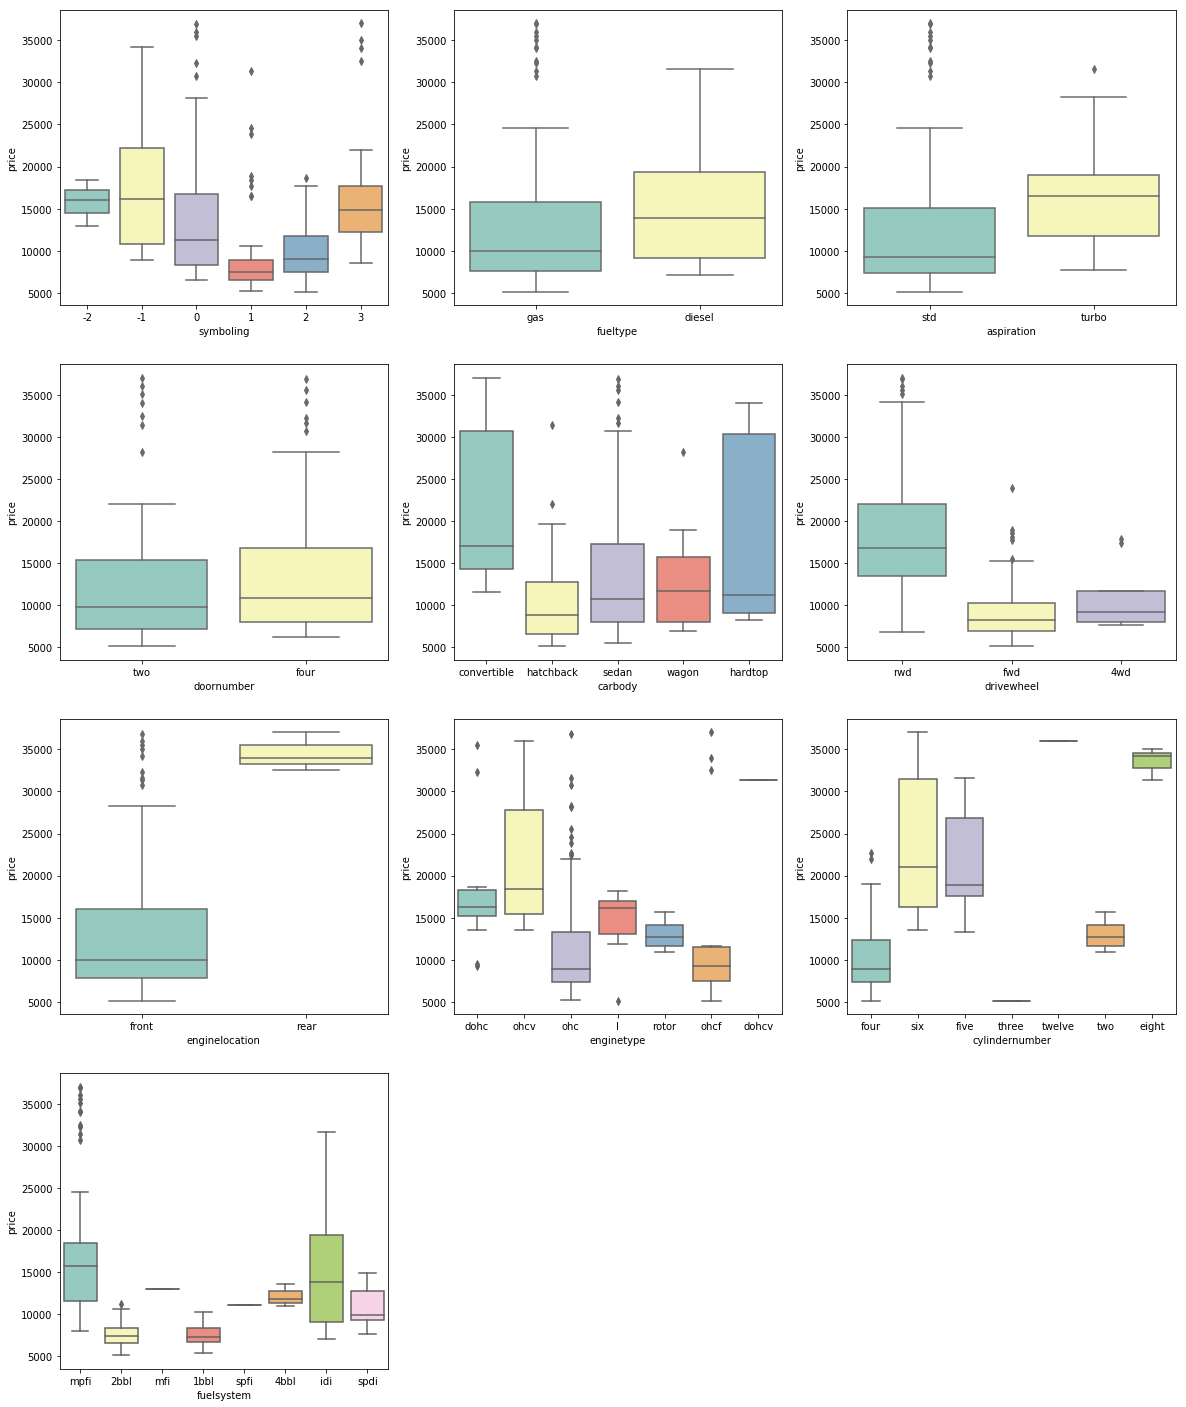

In [14]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', palette='Set3', data = carInfo)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', palette= 'Set3', data = carInfo)
plt.show()

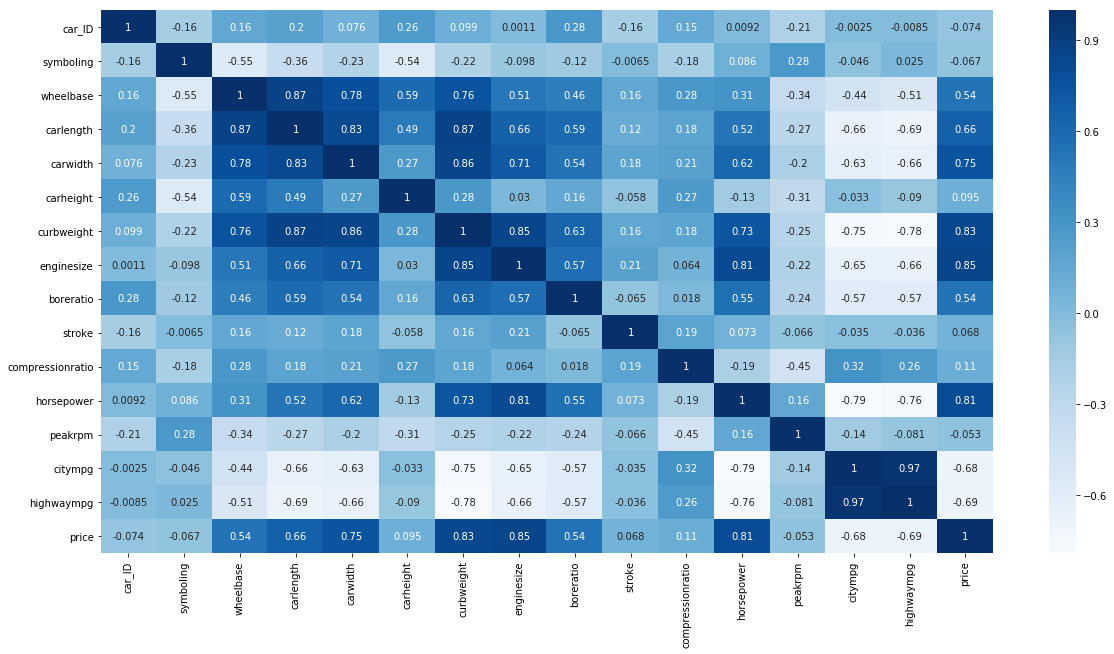

In [15]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(carInfo.corr(), annot = True, cmap="Blues")
plt.show()

In the above correlation map, following can be observed :<br>
    -There is a high correlation (more than 80%) between
        - carlength and wheelbase -> 0.87
        - carlength and curbweight -> 0.87
        - carwidth and carlength -> 0.83
        - carwidth and curbweight -> 0.86
        - curbweight and enginesize -> 0.85
        - horsepower and eninesize -> 0.81
        - highwaympg and citympg -> 0.97
       
              
Hence the following variables can be safely removed : 
    - carlength, carwidth, enginesize, wheelbase, and highwaympg

## Step 4: Data Preparation

Delete columns which suggest existance of high correlation <br>
Create dummy columns to convert a category column into a numerical column for creation the train and test data

In [16]:
#Removing the highly correlated variables

carInfo.drop(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'highwaympg'], axis = 1, inplace = True)

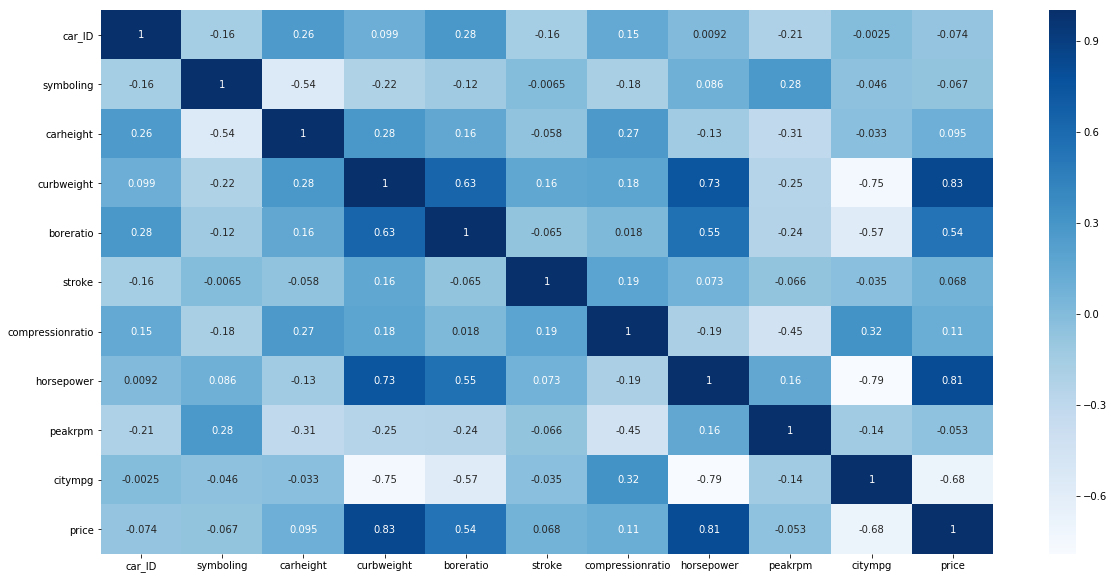

In [17]:
# check correlation after dropping columns

plt.figure(figsize = (20, 10))
sns.heatmap(carInfo.corr(), annot = True, cmap="Blues")
plt.show()

There are no independent numerical variables having more than 80 % positive correlation in the above heat map

In [18]:
# Since the below fields contains only 2 values, creating values of binary type instead of dummy variables.

carInfo['d_fueltype'] = carInfo['fueltype'].map({'diesel':0, 'gas':1})
carInfo['d_aspiration'] = carInfo['aspiration'].map({'turbo':0, 'std':1})
carInfo['d_doornumber'] = carInfo['doornumber'].map({'four':0, 'two':1})
carInfo['d_enginelocation'] = carInfo['enginelocation'].map({'rear':0, 'front':1})
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,d_aspiration,d_doornumber,d_enginelocation
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,2.68,9.0,111,5000,21,13495.0,1,1,1,1
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,2.68,9.0,111,5000,21,16500.0,1,1,1,1
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,3.47,9.0,154,5000,19,16500.0,1,1,1,1
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,3.40,10.0,102,5500,24,13950.0,1,1,0,1
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,3.40,8.0,115,5500,18,17450.0,1,1,0,1


In [19]:
# Removing one column from the dummy variable as there can be only 3 types of wheel drives.
# In case if the values in the data for the 2 fields that are retained is both 0, it would mean that the wheel drive is 
# neither of the both

d_drivewheel = pd.get_dummies(carInfo['drivewheel'], drop_first = True)
carInfo = pd.concat([carInfo, d_drivewheel], axis = 1)
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,horsepower,peakrpm,citympg,price,d_fueltype,d_aspiration,d_doornumber,d_enginelocation,fwd,rwd
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,111,5000,21,13495.0,1,1,1,1,0,1
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,111,5000,21,16500.0,1,1,1,1,0,1
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,154,5000,19,16500.0,1,1,1,1,0,1
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,102,5500,24,13950.0,1,1,0,1,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,115,5500,18,17450.0,1,1,0,1,0,0


In [20]:
# Creating dummies for carbody
# We will not remove any columns for dummies as this would affect our decision making while creating the model.

d_carbody = pd.get_dummies(carInfo['carbody'])
carInfo = pd.concat([carInfo, d_carbody], axis = 1)
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,d_aspiration,d_doornumber,d_enginelocation,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,1,1,1,0,1,1,0,0,0,0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,1,1,1,0,1,1,0,0,0,0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,1,1,1,0,1,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,1,0,1,1,0,0,0,0,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,1,0,1,0,0,0,0,0,1,0


In [21]:
# Creating dummies for symboling
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_symboling = pd.get_dummies(carInfo['symboling'])
carInfo = pd.concat([carInfo, d_symboling], axis = 1)
carInfo = carInfo.rename(columns={-2: '-2_symboling', 
                                  -1: '-1_symboling',
                                   0: '0_symboling',
                                   1: '1_symboling',
                                   2: '2_symboling',
                                   3: '3_symboling'
                                })
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,hardtop,hatchback,sedan,wagon,-2_symboling,-1_symboling,0_symboling,1_symboling,2_symboling,3_symboling
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,0,0,1
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,0,0,1
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,0,0,1,0,0,0,0,0,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,0,0,1,0,0,0,0,0,1,0


In [22]:
# Creating dummies for enginetype
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_enginetype = pd.get_dummies(carInfo['enginetype'])
carInfo = pd.concat([carInfo, d_enginetype], axis = 1)
carInfo = carInfo.rename(columns={'dohc' : 'dohc_enginetype', 
                                  'dohcv': 'dohcv_enginetype',
                                  'l'    : 'l_enginetype',
                                  'ohc'  : 'ohc_enginetype',
                                  'ohcf' : 'ohcf_enginetype',
                                  'ohcv' : 'ohcv_enginetype',
                                  'rotor': 'rotor_enginetype',
                                })
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,1_symboling,2_symboling,3_symboling,dohc_enginetype,dohcv_enginetype,l_enginetype,ohc_enginetype,ohcf_enginetype,ohcv_enginetype,rotor_enginetype
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,1,1,0,0,0,0,0,0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,1,1,0,0,0,0,0,0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,1,0,0,0,0,0,0,0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,0,1,0,0,0,0,1,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,0,1,0,0,0,0,1,0,0,0


In [23]:
# Creating dummies for cylindernumber
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_cylindernumber = pd.get_dummies(carInfo['cylindernumber'])
carInfo = pd.concat([carInfo, d_cylindernumber], axis = 1)
carInfo = carInfo.rename(columns={'five'  : 'five_cylinder', 
                                  'four'  : 'four_cylinder',
                                  'six'   : 'six_cylinder',
                                  'three' : 'three_cylinder',
                                  'twelve': 'twelve_cylinder',
                                  'two'   : 'two_cylinder',
                                  'eight' : 'eight_cylinder',
                                  })

carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,ohcf_enginetype,ohcv_enginetype,rotor_enginetype,eight_cylinder,five_cylinder,four_cylinder,six_cylinder,three_cylinder,twelve_cylinder,two_cylinder
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,0,1,0,0,0,0,1,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,0,0,0,0,0,1,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Creating dummies for fuelsystem
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_fuelsystem = pd.get_dummies(carInfo['fuelsystem'])
carInfo = pd.concat([carInfo, d_fuelsystem], axis = 1)
carInfo = carInfo.rename(columns={'1bbl': '1bbl_fuelsystem', 
                                  '2bbl': '2bbl_fuelsystem',
                                  '4bbl': '4bbl_fuelsystem',
                                  'idi' : 'idi_fuelsystem',
                                  'mpfi': 'mpfi_fuelsystem',
                                  'mfi' : 'mfi_fuelsystem',
                                  'spdi': 'spdi_fuelsystem',
                                  'spfi': 'spfi_fuelsystem',
                                  })
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,twelve_cylinder,two_cylinder,1bbl_fuelsystem,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Creating dummies for carname
# We will not remove any columns for dummies as this would affect our decision making while creating the model.

d_carname = pd.get_dummies(carInfo['carname'])
carInfo = pd.concat([carInfo, d_carname], axis = 1)
carInfo.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Drop the following columns as we have already converted all columns to numeric value.
# The car_id can also be dropped as we would no longer use that field

carInfo = carInfo.drop(['car_ID', 'symboling', 'carname','fueltype', 'aspiration','doornumber', 'carbody','drivewheel',
                         'enginelocation','enginetype','cylindernumber','fuelsystem'], axis=1)
carInfo.head()

,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,48.8,2548,3.47,2.68,9.0,111,5000,21,13495.0,1,...,0,0,0,0,0,0,0,0,0,0
1,48.8,2548,3.47,2.68,9.0,111,5000,21,16500.0,1,...,0,0,0,0,0,0,0,0,0,0
2,52.4,2823,2.68,3.47,9.0,154,5000,19,16500.0,1,...,0,0,0,0,0,0,0,0,0,0
3,54.3,2337,3.19,3.40,10.0,102,5500,24,13950.0,1,...,0,0,0,0,0,0,0,0,0,0
4,54.3,2824,3.19,3.40,8.0,115,5500,18,17450.0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# following columns are there in the final table

carInfo.columns

Index(['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price', 'd_fueltype',
       'd_aspiration', 'd_doornumber', 'd_enginelocation', 'fwd', 'rwd',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '-2_symboling',
       '-1_symboling', '0_symboling', '1_symboling', '2_symboling',
       '3_symboling', 'dohc_enginetype', 'dohcv_enginetype', 'l_enginetype',
       'ohc_enginetype', 'ohcf_enginetype', 'ohcv_enginetype',
       'rotor_enginetype', 'eight_cylinder', 'five_cylinder', 'four_cylinder',
       'six_cylinder', 'three_cylinder', 'twelve_cylinder', 'two_cylinder',
       '1bbl_fuelsystem', '2bbl_fuelsystem', '4bbl_fuelsystem',
       'idi_fuelsystem', 'mfi_fuelsystem', 'mpfi_fuelsystem',
       'spdi_fuelsystem', 'spfi_fuelsystem', 'alfa-romeo', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', '

In [28]:
# inspect the dataframe shape

carInfo.shape

(202, 70)

In [29]:
# view couple of rows in the data frame

carInfo.head()

,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,48.8,2548,3.47,2.68,9.0,111,5000,21,13495.0,1,...,0,0,0,0,0,0,0,0,0,0
1,48.8,2548,3.47,2.68,9.0,111,5000,21,16500.0,1,...,0,0,0,0,0,0,0,0,0,0
2,52.4,2823,2.68,3.47,9.0,154,5000,19,16500.0,1,...,0,0,0,0,0,0,0,0,0,0
3,54.3,2337,3.19,3.40,10.0,102,5500,24,13950.0,1,...,0,0,0,0,0,0,0,0,0,0
4,54.3,2824,3.19,3.40,8.0,115,5500,18,17450.0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Model Building

### Splitting data into training and test 

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(carInfo, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# checking the df_train shape

print(df_train.shape)

(141, 70)


### Rescaling the features with MinMax Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
1,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.235294,0.358353,1,...,0,0,0,0,0,0,0,0,0,0
165,0.400000,0.301396,0.500000,0.480952,0.15000,0.266667,1.000000,0.382353,0.131604,1,...,0,0,0,0,0,0,0,1,0,0
197,0.808333,0.602793,0.885714,0.514286,0.15625,0.275000,0.510204,0.323529,0.358825,1,...,0,0,0,0,0,0,0,0,0,1
169,0.350000,0.412335,0.771429,0.680952,0.14375,0.283333,0.265306,0.323529,0.153359,1,...,0,0,0,0,0,0,0,1,0,0
190,0.300000,0.284329,0.464286,0.633333,0.09375,0.175000,0.551020,0.323529,0.153076,1,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df_train.describe()

,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.00000,141.000000,141.000000
mean,0.50461,0.411779,0.559980,0.551570,0.210381,0.228310,0.392387,0.358365,0.247719,0.886525,...,0.092199,0.063830,0.014184,0.021277,0.0,0.035461,0.078014,0.12766,0.070922,0.049645
std,0.20748,0.198452,0.192528,0.150278,0.263427,0.164713,0.199860,0.185704,0.229291,0.318304,...,0.290337,0.245321,0.118672,0.144819,0.0,0.185601,0.269150,0.33490,0.257610,0.217986
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.35000,0.254849,0.421429,0.490476,0.100000,0.091667,0.265306,0.176471,0.087432,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.52500,0.359193,0.550000,0.571429,0.125000,0.195833,0.387755,0.352941,0.175682,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.65000,0.552366,0.742857,0.633333,0.150000,0.283333,0.551020,0.500000,0.342548,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('price')
X_train = df_train

### Recursive feature elimination (RFE)

In [36]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carheight', False, 21),
 ('curbweight', True, 1),
 ('boreratio', False, 49),
 ('stroke', False, 47),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('citympg', False, 8),
 ('d_fueltype', False, 16),
 ('d_aspiration', False, 45),
 ('d_doornumber', False, 26),
 ('d_enginelocation', True, 1),
 ('fwd', False, 44),
 ('rwd', False, 48),
 ('convertible', True, 1),
 ('hardtop', False, 25),
 ('hatchback', False, 38),
 ('sedan', False, 37),
 ('wagon', False, 20),
 ('-2_symboling', True, 1),
 ('-1_symboling', False, 22),
 ('0_symboling', False, 36),
 ('1_symboling', False, 28),
 ('2_symboling', False, 39),
 ('3_symboling', False, 27),
 ('dohc_enginetype', False, 40),
 ('dohcv_enginetype', True, 1),
 ('l_enginetype', False, 33),
 ('ohc_enginetype', False, 17),
 ('ohcf_enginetype', True, 1),
 ('ohcv_enginetype', True, 1),
 ('rotor_enginetype', False, 19),
 ('eight_cylinder', True, 1),
 ('five_cylinder', False, 4),
 ('four_cylinder', True, 1),
 ('six_cylinder

In [38]:
# Variables which would be used for model building

col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'horsepower', 'd_enginelocation', 'convertible',
       '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype',
       'ohcv_enginetype', 'eight_cylinder', 'four_cylinder', 'idi_fuelsystem',
       'audi', 'bmw', 'buick', 'jaguar', 'mitsubishi', 'plymouth', 'porsche',
       'subaru', 'volvo'],
      dtype='object')

In [39]:
# Variables that would not be used for model building

X_train.columns[~rfe.support_]

Index(['carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'd_fueltype', 'd_aspiration', 'd_doornumber', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', '-1_symboling', '0_symboling',
       '1_symboling', '2_symboling', '3_symboling', 'dohc_enginetype',
       'l_enginetype', 'ohc_enginetype', 'rotor_enginetype', 'five_cylinder',
       'six_cylinder', 'three_cylinder', 'twelve_cylinder', 'two_cylinder',
       '1bbl_fuelsystem', '2bbl_fuelsystem', '4bbl_fuelsystem',
       'mfi_fuelsystem', 'mpfi_fuelsystem', 'spdi_fuelsystem',
       'spfi_fuelsystem', 'alfa-romeo', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mercury', 'nissan', 'peugeot', 'renault', 'saab', 'toyota',
       'volkswagen'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1: Initial model using the RFE selected variables

In [40]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_without_constant_1 = X_train_rfe

In [41]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_rfe)

# Running the linear model

lm1 = sm.OLS(y_train,X_train_1).fit()   

#Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.13e-75
Time:                        20:47:19   Log-Likelihood:                 231.14
No. Observations:                 141   AIC:                            -424.3
Df Residuals:                     122   BIC:                            -368.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1524      0.022  

In [42]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,subaru,inf
17,porsche,inf
5,dohcv_enginetype,inf
6,ohcf_enginetype,inf
2,d_enginelocation,24.110000
1,horsepower,7.170000
0,curbweight,4.840000
8,eight_cylinder,3.700000
9,four_cylinder,3.060000
13,buick,2.560000


Since VIF values for subaru, porsche, dohcv_enginetype and ohcf_enginetype shows infinity, it implies existence of correlation between these fields and hence let us analyse these variables using heatmap for correlation

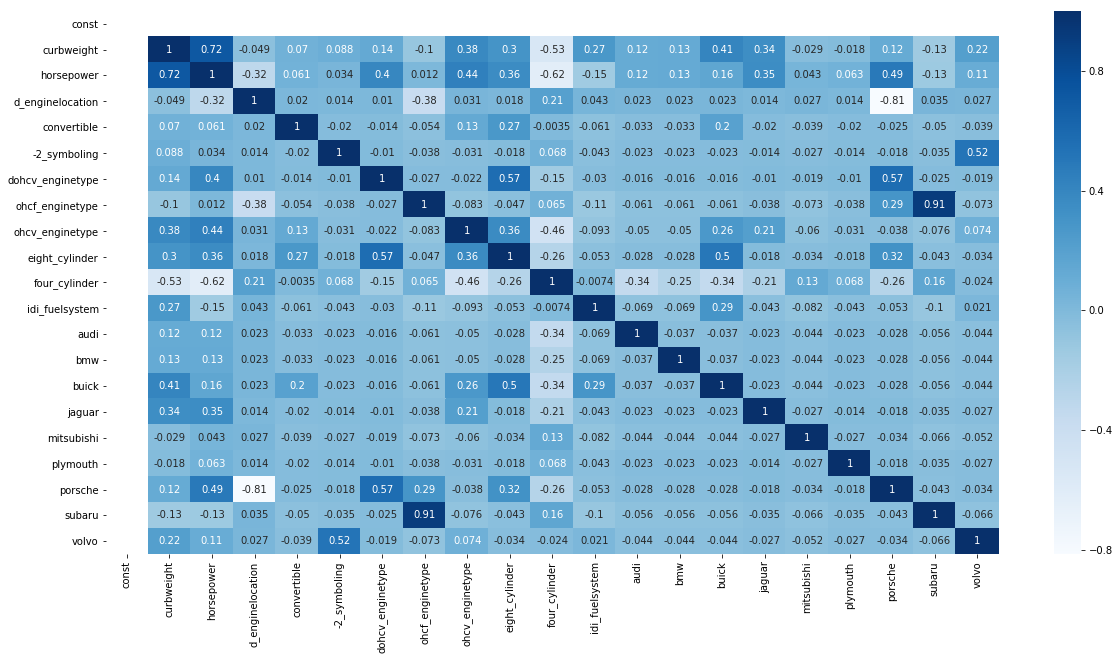

In [43]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_1.corr(), annot = True, cmap="Blues")
plt.show()

Per the above heat map, it can be noticed that 
    - subaru and ohcf_enginetype has high positive correlation -> 0.91
    - porsche and dohcv_enginetype show a positive correlation -> 0.57 
    - porsche and d_enginelocation show a high negetive correlation -> -0.81
        
So let us first remove subaru and see the impact

In [44]:
X_train_without_constant_2 = X_train_without_constant_1.drop(['subaru'], axis = 1)
X_train_2 = X_train_1.drop(['subaru'], axis = 1)

#### Model 2 : Rebuilding the model without subaru

In [45]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_2)

# Running the linear model

lm2 = sm.OLS(y_train,X_train_lm2).fit() 

#Let's see the summary of our linear model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.13e-75
Time:                        20:47:21   Log-Likelihood:                 231.14
No. Observations:                 141   AIC:                            -424.3
Df Residuals:                     122   BIC:                            -368.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2399      0.031  

In [46]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,d_enginelocation,24.11
1,horsepower,7.17
0,curbweight,4.84
8,eight_cylinder,3.70
5,dohcv_enginetype,3.28
17,porsche,3.11
9,four_cylinder,3.06
13,buick,2.56
7,ohcv_enginetype,2.32
10,idi_fuelsystem,1.90


As per the heat map it was also noticed that there is 81% negative correlation between d_enginelocation and porsche.<br>
Also the VIF value of d_enginelocation is 24.11 which is greater than 5. <br>
Hence removing d_enginelocation as the variable is insignificant

In [47]:
X_train_without_constant_3 = X_train_without_constant_2.drop(['d_enginelocation'], axis = 1)
X_train_3 = X_train_2.drop(['d_enginelocation'], axis = 1)

#### Model 3 : Rebuilding the model without d_enginelocation

In [48]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_3)

 # Running the linear model
    
lm3 = sm.OLS(y_train,X_train_lm3).fit()  

#Let's see the summary of our linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.13e-75
Time:                        20:47:22   Log-Likelihood:                 231.14
No. Observations:                 141   AIC:                            -424.3
Df Residuals:                     122   BIC:                            -368.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0152      0.021  

In [49]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,23.85
1,horsepower,20.24
8,four_cylinder,3.97
7,eight_cylinder,3.69
4,dohcv_enginetype,3.09
16,porsche,2.82
12,buick,2.57
6,ohcv_enginetype,2.34
9,idi_fuelsystem,2.15
17,volvo,1.63


Plymouth has a high p-value > 0.05, it is insignificant and hence removing the variable 

In [50]:
X_train_without_constant_4 = X_train_without_constant_3.drop(['plymouth'], axis = 1)
X_train_4 = X_train_3.drop(["plymouth"], axis = 1)

#### Model 4 : Rebuilding the model without plymouth

In [51]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_4)

 # Running the linear model
    
lm4 = sm.OLS(y_train,X_train_lm4).fit()  

#Let's see the summary of our linear model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.50e-75
Time:                        20:47:22   Log-Likelihood:                 229.67
No. Observations:                 141   AIC:                            -423.3
Df Residuals:                     123   BIC:                            -370.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0128      0.021  

In [52]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,23.30
1,horsepower,19.29
8,four_cylinder,3.94
7,eight_cylinder,3.68
4,dohcv_enginetype,3.07
15,porsche,2.79
12,buick,2.57
6,ohcv_enginetype,2.32
9,idi_fuelsystem,2.14
16,volvo,1.63


ohcf_enginetype has a p-value > 0.05, it is insignificant and hence removing the variable 

In [53]:
X_train_without_constant_5 = X_train_without_constant_4.drop(['ohcf_enginetype'], axis = 1)
X_train_5 = X_train_4.drop(["ohcf_enginetype"], axis = 1)

#### Model 5 : Rebuilding the model without ohcf_enginetype

In [54]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_5)

 # Running the linear model
    
lm5 = sm.OLS(y_train,X_train_lm5).fit()  

#Let's see the summary of our linear model

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.54e-76
Time:                        20:47:23   Log-Likelihood:                 227.94
No. Observations:                 141   AIC:                            -421.9
Df Residuals:                     124   BIC:                            -371.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0138      0.021  

In [55]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,23.26
1,horsepower,19.27
7,four_cylinder,3.78
6,eight_cylinder,3.68
4,dohcv_enginetype,2.99
11,buick,2.57
14,porsche,2.45
5,ohcv_enginetype,2.32
8,idi_fuelsystem,2.11
15,volvo,1.63


curbwight has a VIF value of 23.26 which is greater than 5. Hence removing the variable

In [56]:
X_train_without_constant_6 = X_train_without_constant_5.drop(['curbweight'], axis = 1)
X_train_6 = X_train_5.drop(["curbweight"], axis = 1)

#### Model 6 : Rebuilding the model without curbweight

In [57]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_6)

 # Running the linear model
    
lm6 = sm.OLS(y_train,X_train_lm6).fit()  

#Let's see the summary of our linear model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.30e-64
Time:                        20:47:23   Log-Likelihood:                 195.75
No. Observations:                 141   AIC:                            -359.5
Df Residuals:                     125   BIC:                            -312.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0381      0.026  

In [58]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,5.91
5,eight_cylinder,3.63
3,dohcv_enginetype,2.90
6,four_cylinder,2.67
10,buick,2.42
4,ohcv_enginetype,2.31
13,porsche,2.20
14,volvo,1.57
2,-2_symboling,1.43
7,idi_fuelsystem,1.41


four_cylinder has a p-value > 0.05, it is insignificant and hence removing the variable 

In [59]:
X_train_without_constant_7 = X_train_without_constant_6.drop(['four_cylinder'], axis = 1)
X_train_7 = X_train_6.drop(["four_cylinder"], axis = 1)

#### Model 7 : Rebuilding the model without four_cylinder

In [60]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_7)

 # Running the linear model
    
lm7 = sm.OLS(y_train,X_train_lm7).fit()  

#Let's see the summary of our linear model

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.41e-65
Time:                        20:47:24   Log-Likelihood:                 193.66
No. Observations:                 141   AIC:                            -357.3
Df Residuals:                     126   BIC:                            -313.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0057      0.012  

In [61]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,eight_cylinder,3.47
0,horsepower,2.84
3,dohcv_enginetype,2.73
9,buick,2.11
12,porsche,1.84
4,ohcv_enginetype,1.83
13,volvo,1.55
2,-2_symboling,1.42
6,idi_fuelsystem,1.30
10,jaguar,1.21


ohcv_enginetype has a p-value > 0.05, it is insignificant and hence removing the variable 

In [62]:
X_train_without_constant_8 = X_train_without_constant_7.drop(['ohcv_enginetype'], axis = 1)
X_train_8 = X_train_7.drop(["ohcv_enginetype"], axis = 1)

#### Model 8 : Rebuilding the model without ohcv_enginetype

In [63]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm8 = sm.add_constant(X_train_8)

 # Running the linear model
    
lm8 = sm.OLS(y_train,X_train_lm8).fit()  

#Let's see the summary of our linear model

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.25e-65
Time:                        20:47:24   Log-Likelihood:                 191.55
No. Observations:                 141   AIC:                            -355.1
Df Residuals:                     127   BIC:                            -313.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0017      0.011  

In [64]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,eight_cylinder,2.96
3,dohcv_enginetype,2.49
0,horsepower,2.22
8,buick,2.10
11,porsche,1.76
12,volvo,1.55
2,-2_symboling,1.41
5,idi_fuelsystem,1.28
9,jaguar,1.20
1,convertible,1.17


Though the p-value of convertible is < 0.05, let us remove that and see if there is any impact

In [65]:
X_train_without_constant_9 = X_train_without_constant_8.drop(['convertible'], axis = 1)
X_train_9 = X_train_8.drop(["convertible"], axis = 1)

#### Model 9 : Rebuilding the model without convertible

In [66]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm9 = sm.add_constant(X_train_9)

 # Running the linear model
    
lm9 = sm.OLS(y_train,X_train_lm9).fit()  

#Let's see the summary of our linear model

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.12e-65
Time:                        20:47:24   Log-Likelihood:                 188.85
No. Observations:                 141   AIC:                            -351.7
Df Residuals:                     128   BIC:                            -313.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0031      0.012  

In [67]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,eight_cylinder,2.77
2,dohcv_enginetype,2.41
0,horsepower,2.16
7,buick,2.10
10,porsche,1.75
11,volvo,1.55
1,-2_symboling,1.41
4,idi_fuelsystem,1.28
8,jaguar,1.20
6,bmw,1.11


The R-squared and Adjusted R-Squared values decreased slightly.<br>
There was a slight increase in the p-value of -2_symboling and a slight decrease in the p-value of mitsubishi.

Though the p-value of -2_symboling is < 0.05, let us see if removing it has any impact 

In [68]:
X_train_without_constant_10 = X_train_without_constant_9.drop(['-2_symboling'], axis = 1)
X_train_10 = X_train_9.drop(["-2_symboling"], axis = 1)

#### Model 10 : Rebuilding the model without -2_symboling

In [69]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm10 = sm.add_constant(X_train_10)

 # Running the linear model
    
lm10 = sm.OLS(y_train,X_train_lm10).fit()  

#Let's see the summary of our linear model

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.67e-65
Time:                        20:47:25   Log-Likelihood:                 186.23
No. Observations:                 141   AIC:                            -348.5
Df Residuals:                     129   BIC:                            -313.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0015      0.012  

In [70]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,eight_cylinder,2.77
1,dohcv_enginetype,2.41
0,horsepower,2.16
6,buick,2.10
9,porsche,1.75
3,idi_fuelsystem,1.28
7,jaguar,1.20
10,volvo,1.13
5,bmw,1.11
4,audi,1.10


The R-squared and Adjusted R-Squared values decreased slightly.<br>
There was a slight increase in the p-value of mitsubishi.

Though the p-value of mitsubishi is < 0.05, let us see if removing it has any impact

In [71]:
X_train_without_constant_11 = X_train_without_constant_10.drop(['mitsubishi'], axis = 1)
X_train_11 = X_train_10.drop(["mitsubishi"], axis = 1)

#### Model 11 : Rebuilding the model without mitsubishi

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm11 = sm.add_constant(X_train_11)

 # Running the linear model
lm11 = sm.OLS(y_train,X_train_lm11).fit()  

#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     142.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.83e-65
Time:                        20:47:26   Log-Likelihood:                 182.96
No. Observations:                 141   AIC:                            -343.9
Df Residuals:                     130   BIC:                            -311.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.012  

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,eight_cylinder,2.76
1,dohcv_enginetype,2.41
6,buick,2.09
0,horsepower,1.98
8,porsche,1.73
3,idi_fuelsystem,1.27
7,jaguar,1.18
9,volvo,1.12
4,audi,1.10
5,bmw,1.10


Observations :

    - The p-values of all independent variables is 0.000 , which is less than 0.05 and hence they seem to be good
    - The VIF values of all the variables are < 3, which is also good.
    - The R-Squared and adjusted R-Squared values are 91.6% and 91.0%, which look good.

The VIF's and p-values are both within the acceptable range. Hence we can finalize on this model # 11 for prediction.

In [74]:
# Print the final columns

X_train_11.columns

Index(['const', 'horsepower', 'dohcv_enginetype', 'eight_cylinder',
       'idi_fuelsystem', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'volvo'],
      dtype='object')

In [75]:
# Remove the const variable from the final column

X_train_11 = X_train_11.drop(['const'], axis=1)

In [76]:
# Calculate the VIFs for the new model after removing the const column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,eight_cylinder,2.76
1,dohcv_enginetype,2.41
6,buick,2.09
0,horsepower,1.98
8,porsche,1.73
3,idi_fuelsystem,1.27
7,jaguar,1.18
9,volvo,1.12
4,audi,1.10
5,bmw,1.10


The VIF values are all the same after dropping the const variable

## Step 6 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_price = lm11.predict(X_train_lm11)

Text(0.5,0,'Errors')

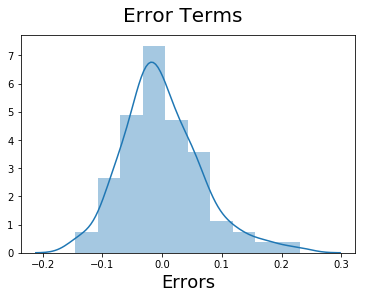

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

As per the above graph, looks like the residuals are normally distributed around 0. <br>
As for the distribution itself, while for most part the distribution is normal except for the right part towards 0.3, 
where it is spread out a little bit more.<br>
However, this model is good for predictions as the Adjusted R-Squares is good.

## Step 7 : Making predictions using the final model - Model 11

#### Applying the scaling on the test sets

In [79]:
num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
df_test.describe()

,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,d_fueltype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.462295,0.398320,0.559251,0.591803,0.170697,0.230328,0.417531,0.377049,0.232683,0.934426,...,0.081967,0.032787,0.081967,0.032787,0.032787,0.016393,0.016393,0.229508,0.032787,0.065574
std,0.194678,0.192157,0.190315,0.147778,0.213526,0.153193,0.181184,0.200598,0.221210,0.249590,...,0.276591,0.179556,0.276591,0.179556,0.179556,0.128037,0.128037,0.424006,0.179556,0.249590
min,0.133333,0.087277,0.264286,0.057143,0.000000,0.016667,0.020408,0.058824,0.008532,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.264158,0.435714,0.514286,0.100000,0.091667,0.265306,0.205882,0.082489,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.433333,0.354926,0.521429,0.580952,0.125000,0.204167,0.428571,0.323529,0.142340,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.616667,0.557797,0.742857,0.661905,0.150000,0.283333,0.551020,0.529412,0.364492,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.662500,1.000000,1.058824,1.004660,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [81]:
y_test = df_test.pop('price')
X_test = df_test

In [82]:
# Now let's use our model to make predictions.

# Creating X_test_lm11 dataframe by taking only the variables that exist in the final train model - X_train_11

X_test_lm11 = X_test[X_train_11.columns]

# Adding a constant variable 

X_test_lm11 = sm.add_constant(X_test_lm11)

In [83]:
# Making predictions unsing the eleventh model

y_pred_lm11 = lm11.predict(X_test_lm11)

## Step 8 : Model Evaluation

Text(0,0.5,'price_prediction')

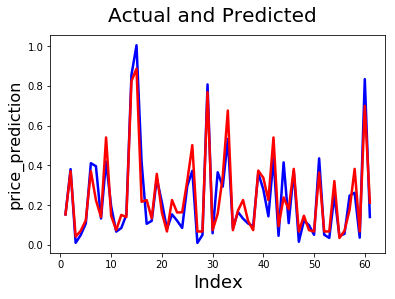

In [84]:
# Actual vs Predicted
# Actual = Blue
# Predicted = Red

c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_lm11, color="red",  linewidth=2.5, linestyle="-")

# Plot heading 
fig.suptitle('Actual and Predicted', fontsize=20)         

# X-label
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('price_prediction', fontsize=16)  

Text(0,0.5,'y_test-y_pred_lm11')

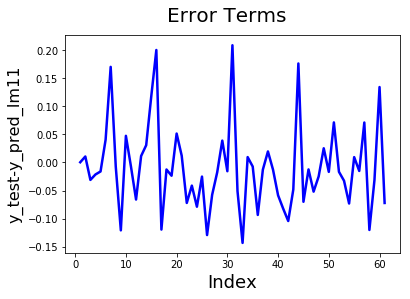

In [85]:
# Error terms

c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_lm11, color="blue", linewidth=2.5, linestyle="-")

# Plot heading
fig.suptitle('Error Terms', fontsize=20) 

# X-label
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test-y_pred_lm11', fontsize=16)  

Text(0,0.5,'y_pred')

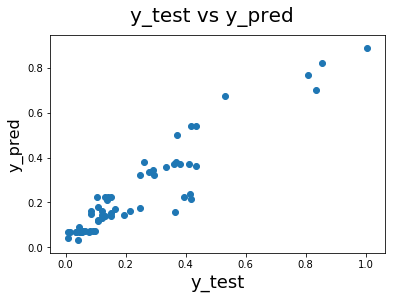

In [86]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lm11)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The model for the most part is capturing the linear association well. <br>
There is a very slight variation in the model which can't be explained.<br>
Overall it looks like a good model

#### We can see that the equation of our best fitted line is:
    
    -> price = 0.7914 * horsepower - 0.5866 * dohcv_enginetype + 0.2604 * eight_cylinder + 0.1362 * idi_fuelsystem + 
               0.1583 * audi + 0.3261 * bmw + 0.3153 * buick + 0.4010 * jaguar + 0.3620 * porsche + 0.1636 * volvo
        
The dohcv_enginetype alone has a negative coefficient

## Step 9 : R squared score

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm11)

0.877553579891089

## Conclusion :

- The model for the most part is capturing the linear association well and overall looks good

- The R square and Adjusted R square values in the above Car Price Model for trained data set are almost very close to each
  other i.e., 91.6 % and 91.0 % respectively. This indicates that none of the parameters in the Car Price Model are reduntant.

- Variance Inflation Factor of all variables is < 3.

- The R-Squared Score on the test dataset is 87.7 %, which is a good value.

- The following variables are significant for predicting the car prices in US Market :
        1. Eight Cylinder 
        2. DOHCV Engine Type 
        3. Horsepower
        4. IDI fuelsystem
        5. Car Make : 
            Buick, Porsche, Jaguar, Volvo, Audi, BMW 